In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:}'.format

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [37]:
path = './Semi_data/길단위인구-행정동.csv'
raw  = pd.read_csv(path, encoding='cp949')

In [38]:
df = pd.DataFrame(raw)

In [39]:
# 데이터 타입 확인
df.dtypes

기준_년분기_코드            int64
행정동_코드               int64
행정동_코드_명            object
총_유동인구_수             int64
남성_유동인구_수            int64
여성_유동인구_수            int64
연령대_10_유동인구_수        int64
연령대_20_유동인구_수        int64
연령대_30_유동인구_수        int64
연령대_40_유동인구_수        int64
연령대_50_유동인구_수        int64
연령대_60_이상_유동인구_수     int64
시간대_00_06_유동인구_수     int64
시간대_06_11_유동인구_수     int64
시간대_11_14_유동인구_수     int64
시간대_14_17_유동인구_수     int64
시간대_17_21_유동인구_수     int64
시간대_21_24_유동인구_수     int64
월요일_유동인구_수           int64
화요일_유동인구_수           int64
수요일_유동인구_수           int64
목요일_유동인구_수           int64
금요일_유동인구_수           int64
토요일_유동인구_수           int64
일요일_유동인구_수           int64
dtype: object

In [40]:
df.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20191,11680531,논현2동,11183375,5543366,5640010,944451,2225363,2808767,2066050,...,1803572,2031575,1172913,1659400,1677522,1735786,1786794,1736149,1366901,1220824
1,20191,11680545,압구정동,8607650,3916486,4691164,1094191,1450907,1729565,1505968,...,1471914,1726021,915644,1220128,1248281,1277257,1328286,1337061,1179721,1016914
2,20191,11680565,청담동,9810656,4548525,5262131,1103971,1625456,2116634,1750156,...,1466970,1702970,1094556,1386197,1426872,1461306,1503777,1506003,1349955,1176546
3,20191,11680580,삼성1동,5909316,2965347,2943970,568090,979347,1384574,1173519,...,1007174,1081661,576423,879429,878754,907463,946688,919721,721373,655889
4,20191,11680590,삼성2동,9146130,4432466,4713663,1256244,1420171,2023253,1813641,...,1258703,1464042,1037184,1360890,1359971,1391206,1423723,1388854,1152540,1068943


In [41]:
df.tail()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
375,20233,11680670,개포2동,2005709,928752,1076957,458213,186799,250450,366876,...,244675,308932,242738,289635,288321,289672,285909,284982,281497,285696
376,20233,11680690,개포4동,3666604,1737952,1928651,648181,451167,608223,633638,...,432499,550293,450718,545647,535242,540385,529078,523366,489752,503136
377,20233,11680700,세곡동,3542249,1599385,1942866,970965,345958,478439,598862,...,387299,547605,471962,510972,508983,504304,499596,494853,500872,522668
378,20233,11680730,일원1동,2626715,1265907,1360809,372377,347198,430215,442237,...,297181,420314,347713,381014,378012,378945,374039,372597,366858,375251
379,20233,11680750,수서동,2217525,1071071,1146454,283226,217091,357753,386346,...,305022,364443,252799,340579,335773,337349,330437,328564,274173,270647


In [42]:
# 데이터 컬럼 확인
df.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수',
       '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

In [43]:
df.shape

(380, 25)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         380 non-null    int64 
 1   행정동_코드            380 non-null    int64 
 2   행정동_코드_명          380 non-null    object
 3   총_유동인구_수          380 non-null    int64 
 4   남성_유동인구_수         380 non-null    int64 
 5   여성_유동인구_수         380 non-null    int64 
 6   연령대_10_유동인구_수     380 non-null    int64 
 7   연령대_20_유동인구_수     380 non-null    int64 
 8   연령대_30_유동인구_수     380 non-null    int64 
 9   연령대_40_유동인구_수     380 non-null    int64 
 10  연령대_50_유동인구_수     380 non-null    int64 
 11  연령대_60_이상_유동인구_수  380 non-null    int64 
 12  시간대_00_06_유동인구_수  380 non-null    int64 
 13  시간대_06_11_유동인구_수  380 non-null    int64 
 14  시간대_11_14_유동인구_수  380 non-null    int64 
 15  시간대_14_17_유동인구_수  380 non-null    int64 
 16  시간대_17_21_유동인구_수  380 non-null    int64 
 17  시간대_21_24_유동인구_수

In [45]:
# 결측치 확인
df.isnull().sum()

기준_년분기_코드           0
행정동_코드              0
행정동_코드_명            0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

<Axes: >

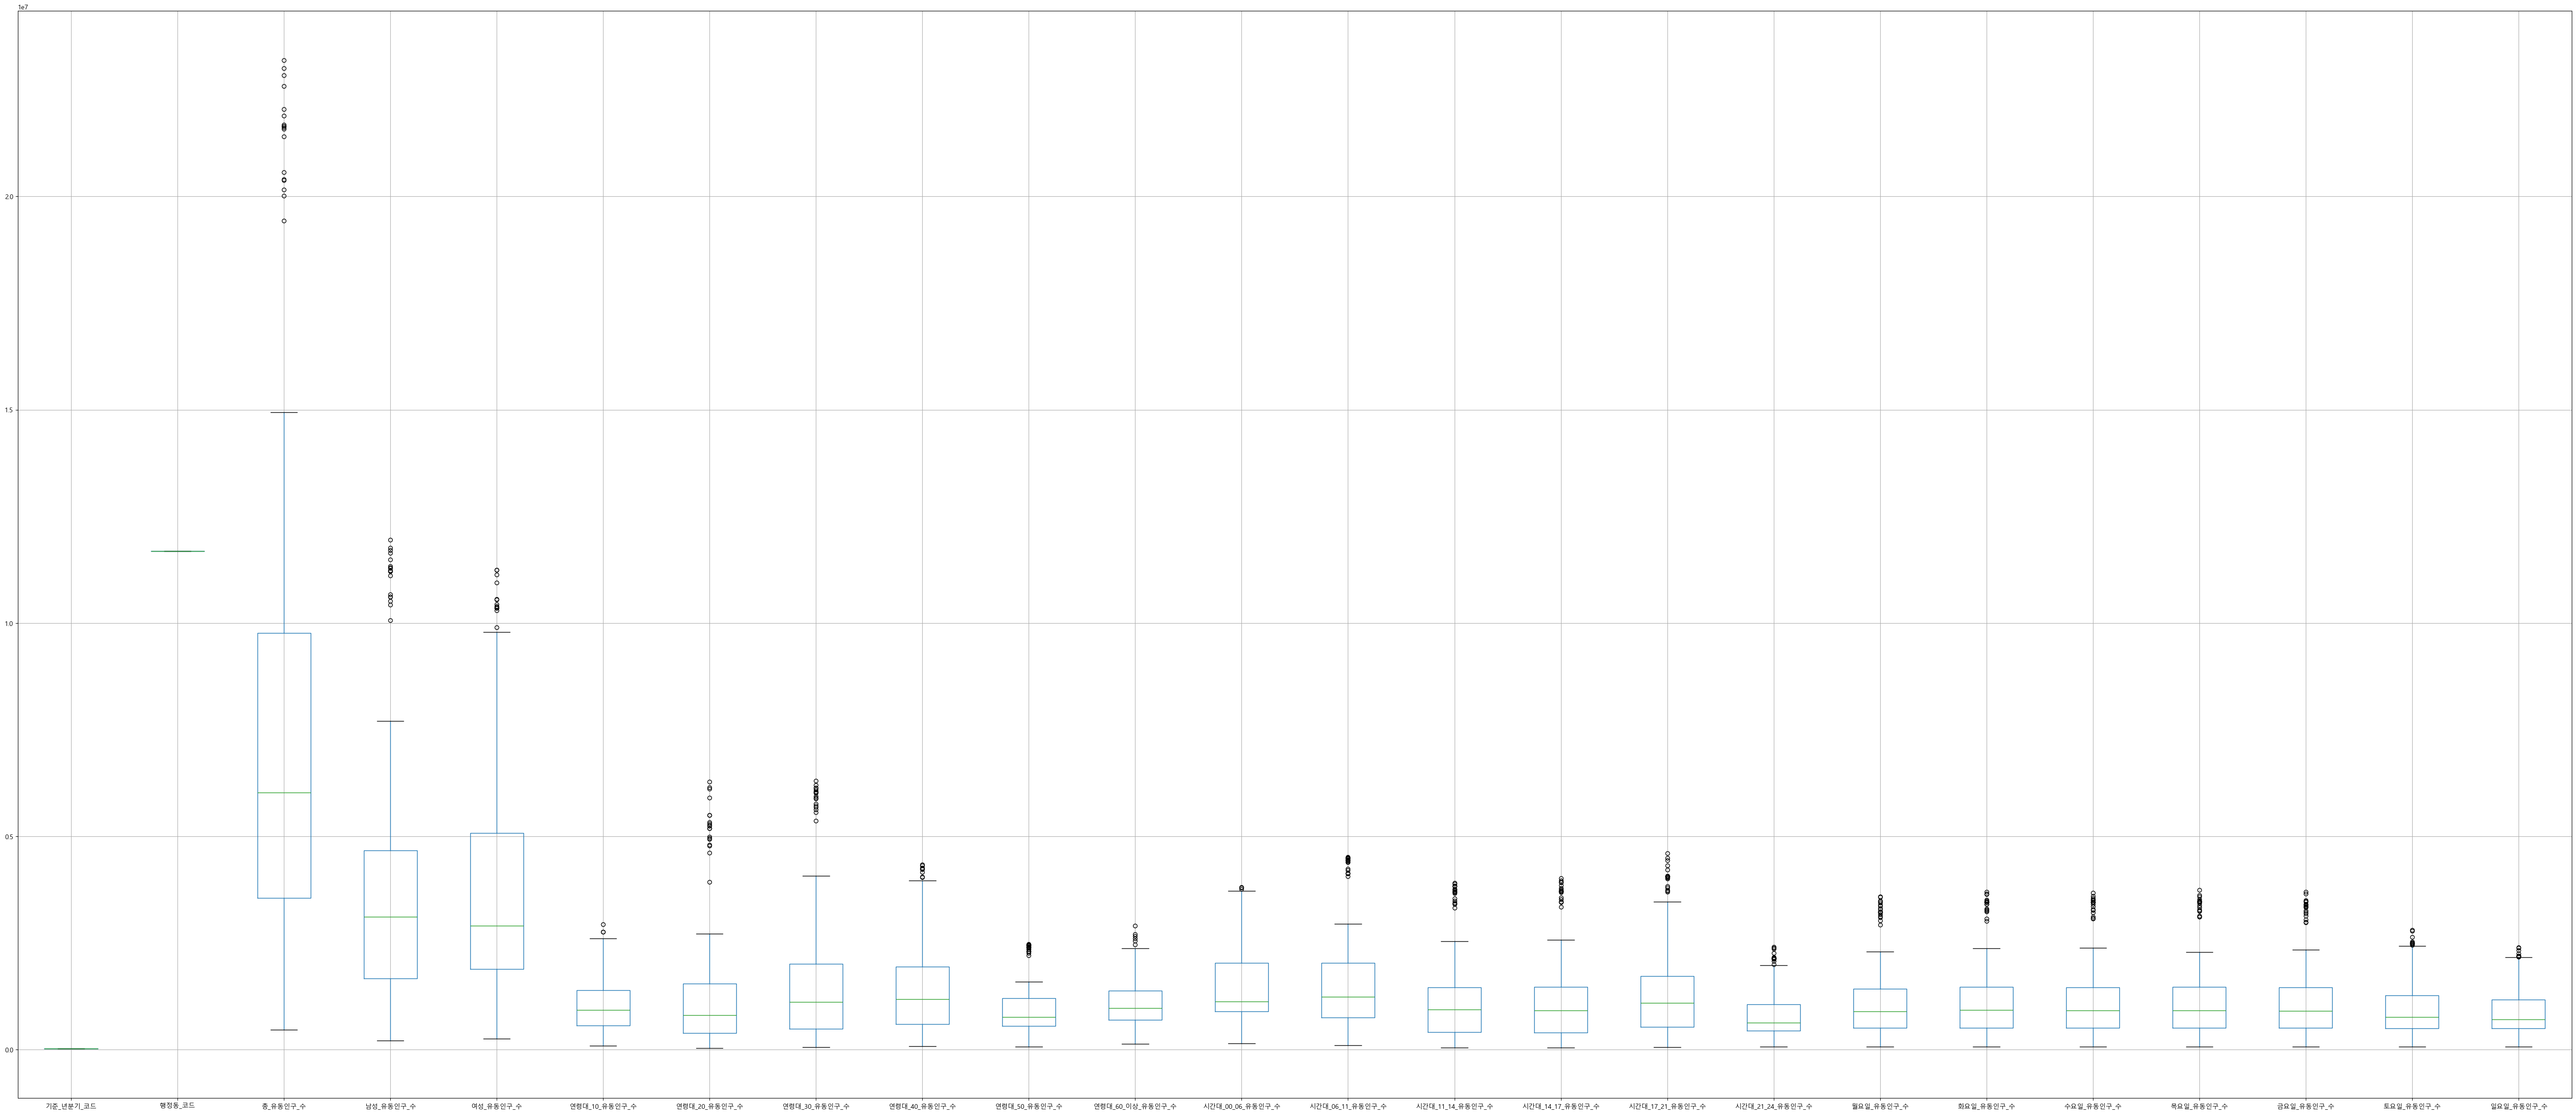

In [46]:
# boxplot 으로 이상치 확인
df.boxplot(figsize=(70,30))

In [47]:
df.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수',
       '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

In [48]:
# '기준_년분기_코드'에서 연도만 추출하여 새로운 열을 생성

df['연도'] = df['기준_년분기_코드'].astype(str).str[:4]

df

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,연도
0,20191,11680531,논현2동,11183375,5543366,5640010,944451,2225363,2808767,2066050,...,2031575,1172913,1659400,1677522,1735786,1786794,1736149,1366901,1220824,2019
1,20191,11680545,압구정동,8607650,3916486,4691164,1094191,1450907,1729565,1505968,...,1726021,915644,1220128,1248281,1277257,1328286,1337061,1179721,1016914,2019
2,20191,11680565,청담동,9810656,4548525,5262131,1103971,1625456,2116634,1750156,...,1702970,1094556,1386197,1426872,1461306,1503777,1506003,1349955,1176546,2019
3,20191,11680580,삼성1동,5909316,2965347,2943970,568090,979347,1384574,1173519,...,1081661,576423,879429,878754,907463,946688,919721,721373,655889,2019
4,20191,11680590,삼성2동,9146130,4432466,4713663,1256244,1420171,2023253,1813641,...,1464042,1037184,1360890,1359971,1391206,1423723,1388854,1152540,1068943,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,20233,11680670,개포2동,2005709,928752,1076957,458213,186799,250450,366876,...,308932,242738,289635,288321,289672,285909,284982,281497,285696,2023
376,20233,11680690,개포4동,3666604,1737952,1928651,648181,451167,608223,633638,...,550293,450718,545647,535242,540385,529078,523366,489752,503136,2023
377,20233,11680700,세곡동,3542249,1599385,1942866,970965,345958,478439,598862,...,547605,471962,510972,508983,504304,499596,494853,500872,522668,2023
378,20233,11680730,일원1동,2626715,1265907,1360809,372377,347198,430215,442237,...,420314,347713,381014,378012,378945,374039,372597,366858,375251,2023


In [66]:
df['행정동_코드_명'].unique()

array(['논현2동', '압구정동', '청담동', '삼성1동', '삼성2동', '대치1동', '대치2동', '대치4동',
       '역삼1동', '역삼2동', '도곡1동', '도곡2동', '개포1동', '개포2동', '개포4동', '세곡동',
       '일원1동', '수서동', '신사동', '논현1동'], dtype=object)

In [67]:
len(df['행정동_코드_명'].unique())

20

In [49]:
temp = df.copy()

In [50]:
temp1 = temp.groupby('행정동_코드_명').get_group('수서동')

In [51]:

# '행정동_코드_명'이 '수서동'인 데이터만 가져오기
suseo_data = temp1[temp1['행정동_코드_명'] == '수서동']

# 연도를 기준으로 데이터를 그룹화하고 각 연도별 총 유동인구 수와 남성 유동인구 수를 계산
yearly_suseo_data = suseo_data.groupby(['연도', '행정동_코드_명']).sum()[['총_유동인구_수', '남성_유동인구_수','여성_유동인구_수']]


yearly_suseo_data

,,총_유동인구_수,남성_유동인구_수,여성_유동인구_수
연도,행정동_코드_명,,,
2019,수서동,9619998,4684045,4935950
2020,수서동,9932433,4881401,5051031
2021,수서동,9463691,4758591,4705098
2022,수서동,9072346,4509095,4563250
2023,수서동,6720212,3271142,3449069


In [52]:
yearly_suseo_data

,,총_유동인구_수,남성_유동인구_수,여성_유동인구_수
연도,행정동_코드_명,,,
2019,수서동,9619998,4684045,4935950
2020,수서동,9932433,4881401,5051031
2021,수서동,9463691,4758591,4705098
2022,수서동,9072346,4509095,4563250
2023,수서동,6720212,3271142,3449069


In [53]:
yearly_suseo_data.reset_index(inplace=True)
yearly_suseo_data

,연도,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수
0,2019,수서동,9619998,4684045,4935950
1,2020,수서동,9932433,4881401,5051031
2,2021,수서동,9463691,4758591,4705098
3,2022,수서동,9072346,4509095,4563250
4,2023,수서동,6720212,3271142,3449069


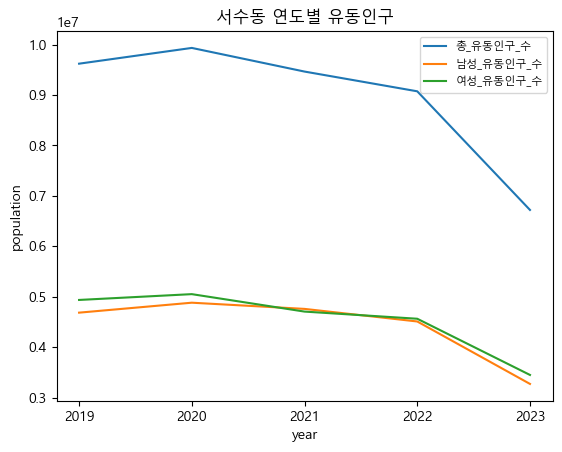

In [54]:
fig, ax = plt.subplots()

ax.plot(yearly_suseo_data['연도'] , yearly_suseo_data['총_유동인구_수'], label='총_유동인구_수')
ax.plot(yearly_suseo_data['연도'] , yearly_suseo_data['남성_유동인구_수'],label='남성_유동인구_수')
ax.plot(yearly_suseo_data['연도'] , yearly_suseo_data['여성_유동인구_수'],label='여성_유동인구_수')

ax.set_title('서수동 연도별 유동인구')
ax.set_xlabel('year')
ax.set_ylabel('population')


ax.legend(loc='best', fontsize=8, fancybox=True)

plt.show()

In [55]:
# 유동인구 성별 피봇테이블 생성
# 유동인구 >> floating population

fp_s_pv = df.pivot_table(index=['기준_년분기_코드','행정동_코드_명'],
               values=['총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수'])


In [56]:
fp_s_pv_191 = fp_s_pv[:20]

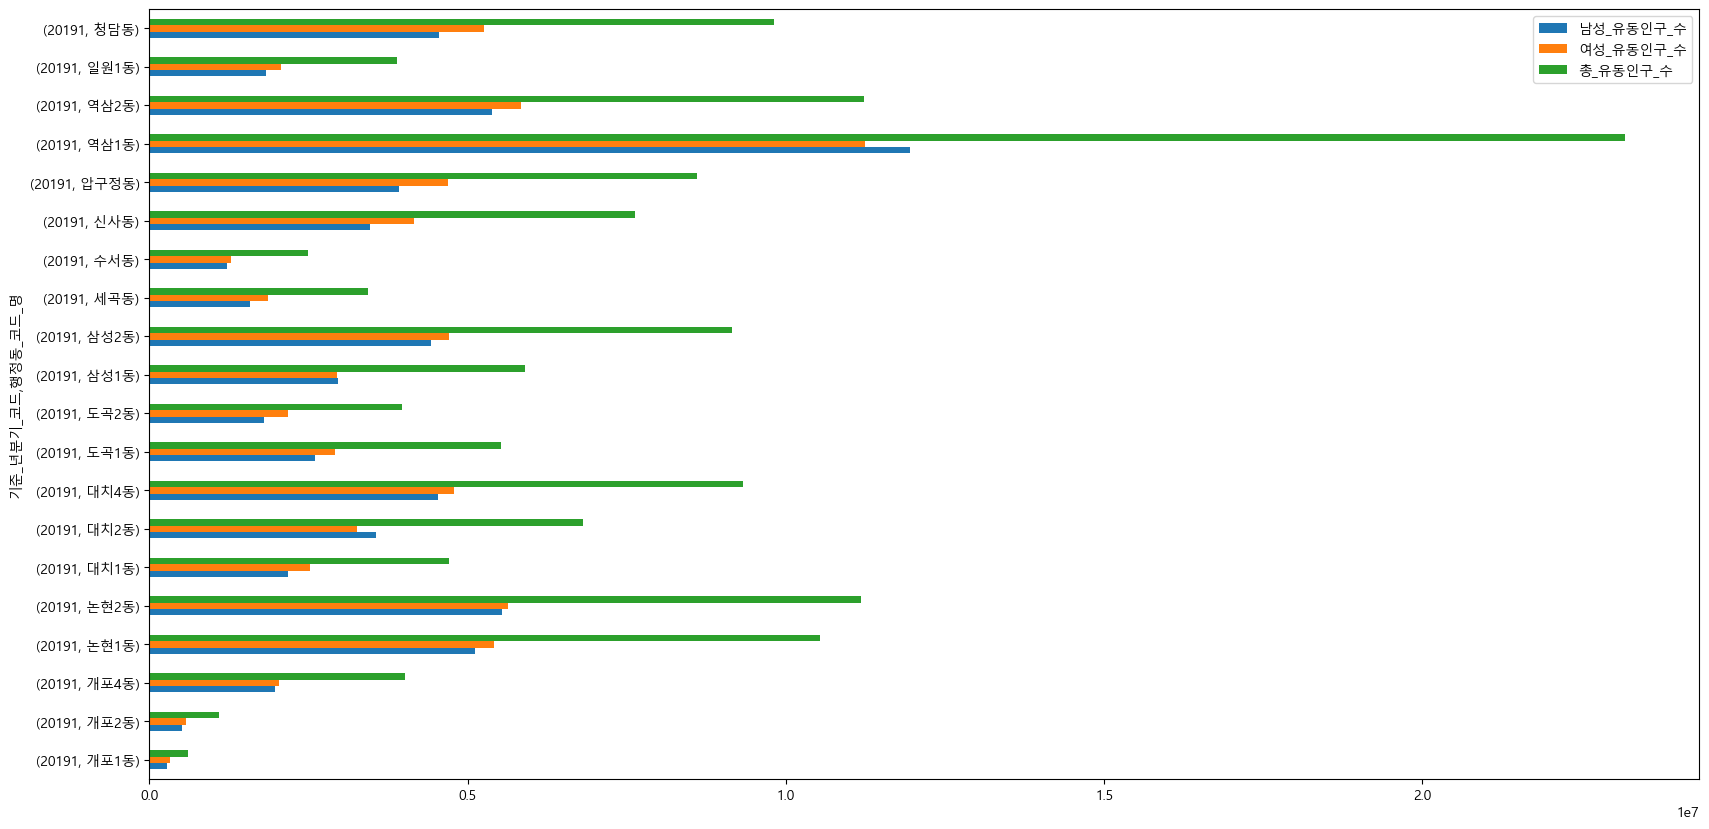

In [57]:
fp_s_pv_191.plot.barh(figsize= (20,10))

plt.legend(loc='best',fontsize=10,fancybox=True)

plt.show()



In [58]:
# 유동인구 연령대 피봇테이블 생성

fp_age_pv = df.pivot_table(index=['기준_년분기_코드','행정동_코드_명'],
               values=['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수'])

In [59]:
fp_age_pv_191 = fp_age_pv[:20]

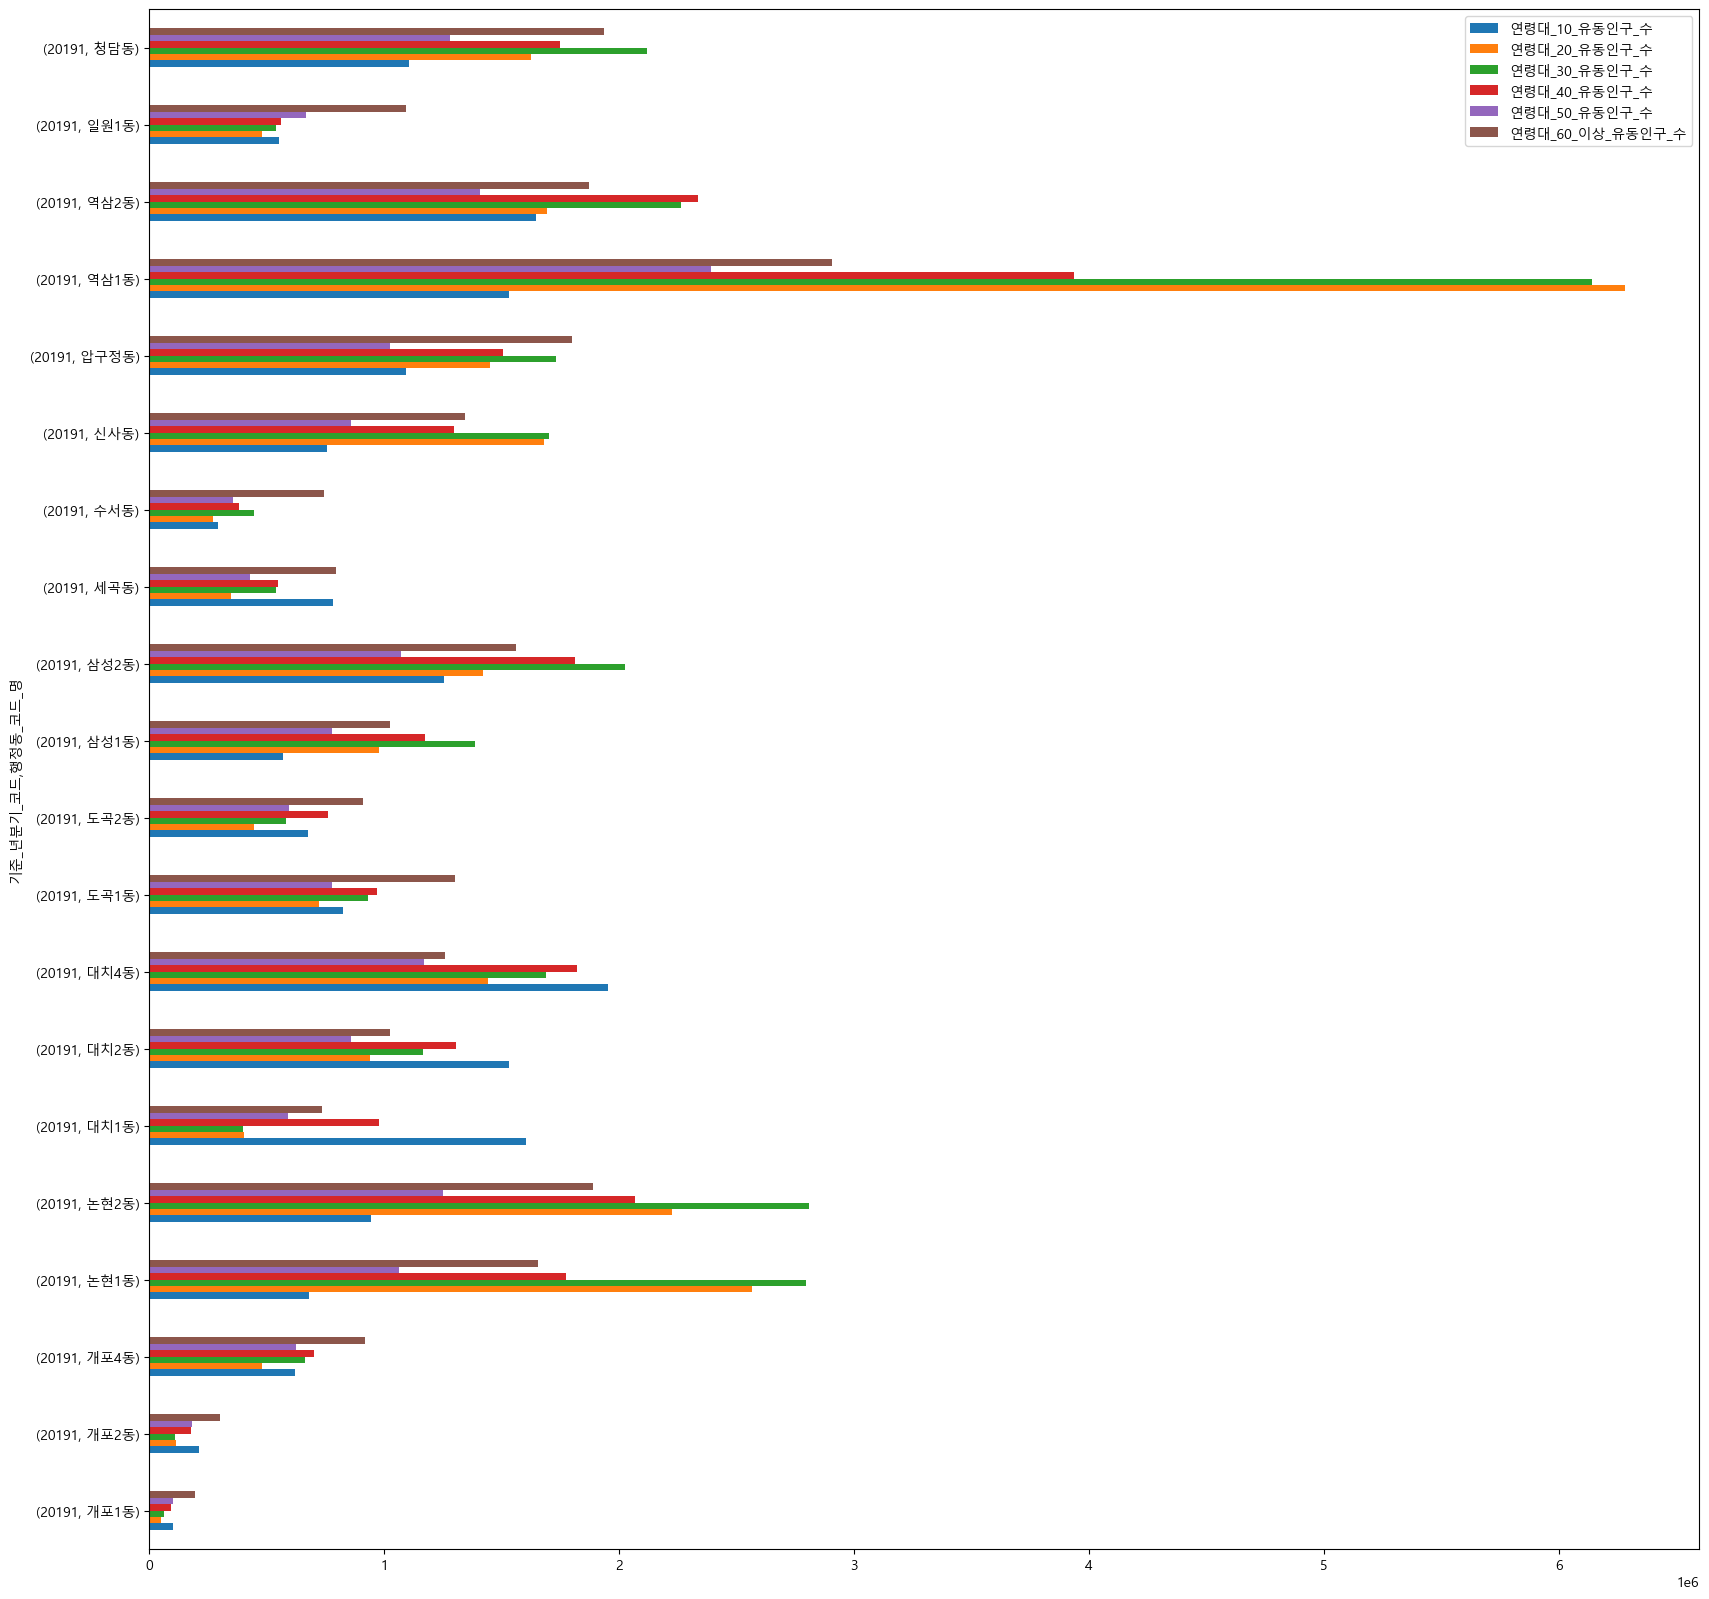

In [60]:
fp_age_pv_191.plot.barh(figsize= (20,20))

plt.legend(loc='best',fontsize=10,fancybox=True)

plt.show()

In [61]:
# 유동인구 시간대별 피봇테이블 생성

fp_time_pv = df.pivot_table(index=['기준_년분기_코드','행정동_코드_명'],
               values=['시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수'])

In [62]:
fp_time_pv_191 = fp_time_pv[:20]

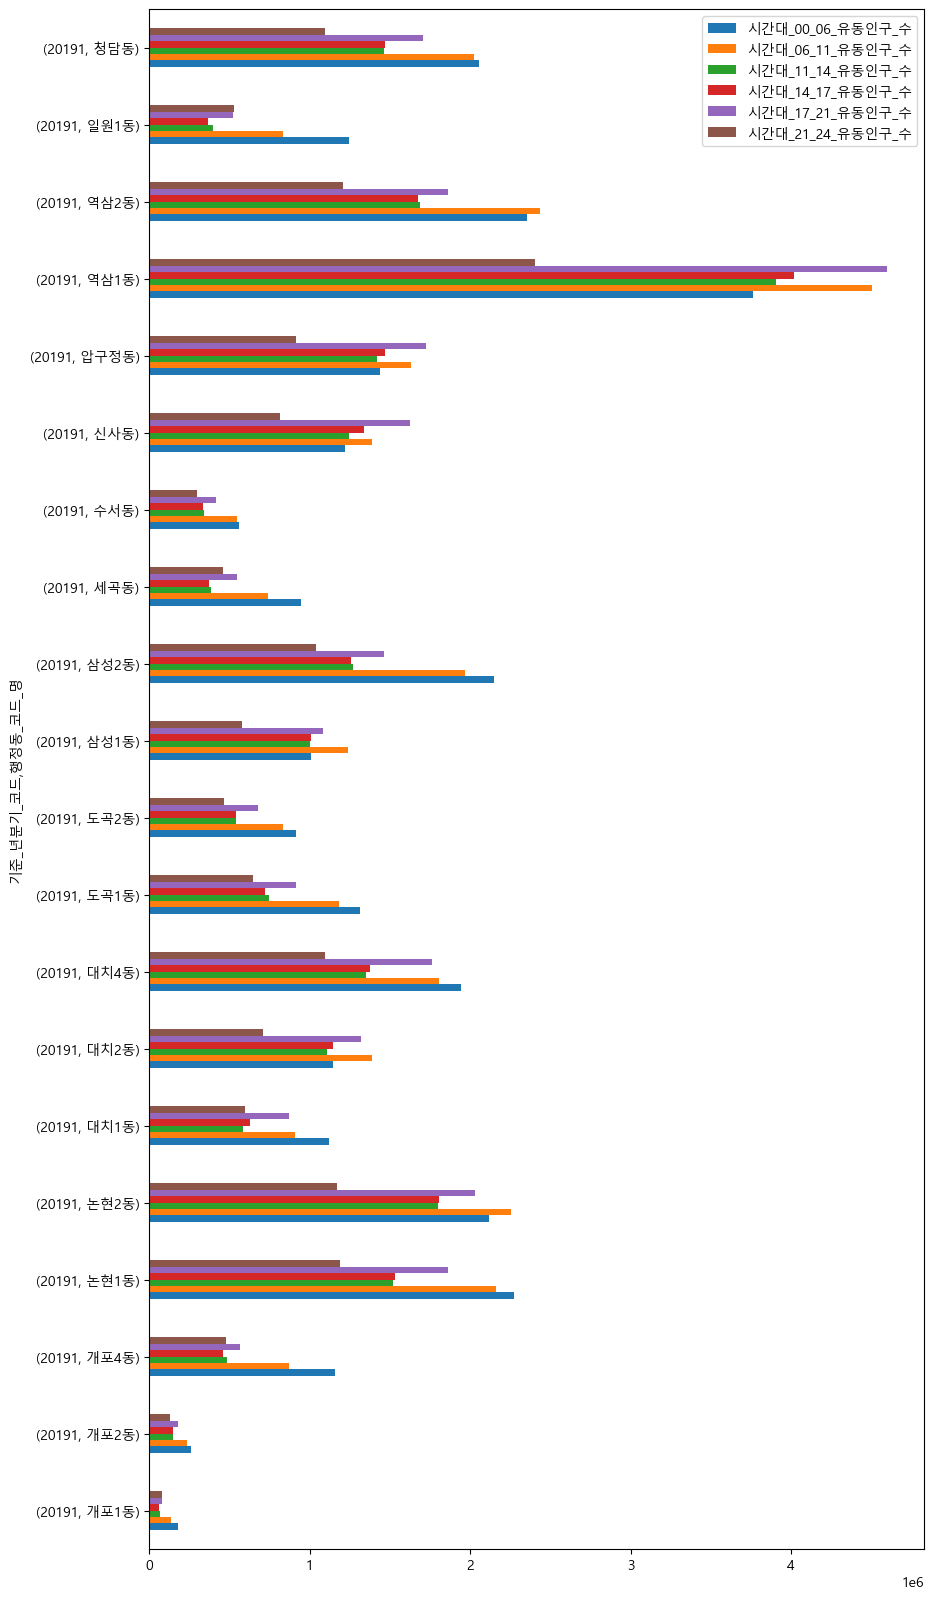

In [63]:
fp_time_pv_191.plot.barh(figsize= (10,20))

plt.legend(loc='best',fontsize=10,fancybox=True)

plt.show()